In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy import stats as sp_stats
from scipy.stats import linregress
df_total = pd.read_csv("../data/steamspy_enriched.csv")
df_enriched=df_total

In [5]:
#Convertimos release_date a datetime con formato mixto
df_total['release_date'] = pd.to_datetime(df_total['release_date'], 
                                               format='mixed', 
                                               dayfirst=True,
                                               errors='coerce')  # Si falla, pone NaT
#Extraemos el año de la fecha
df_total['release_year'] = df_total['release_date'].dt.year
df_total['release_year'] = df_total['release_year']
#Calculamos la proporción de juegos F2P por año (excluyendo NaN)
f2p_propor = df_total[df_total['release_year'].notna()].groupby('release_year').agg({
    'is_free': 'sum',
    'appid': 'count'  
}).reset_index()
f2p_propor.columns = ['release_year', 'f2p_count', 'total_count']
f2p_propor['f2p_proporcion'] = (f2p_propor['f2p_count'] / f2p_propor['total_count']) * 100
f2p_propor['release_year'] = pd.to_numeric(f2p_propor['release_year'], errors='coerce')
f2p_propor['f2p_proporcion'] = pd.to_numeric(f2p_propor['f2p_proporcion'], errors='coerce')
f2p_propor = f2p_propor.dropna()
# Convertimos release_year a int
f2p_propor['release_year'] = f2p_propor['release_year'].astype(int)

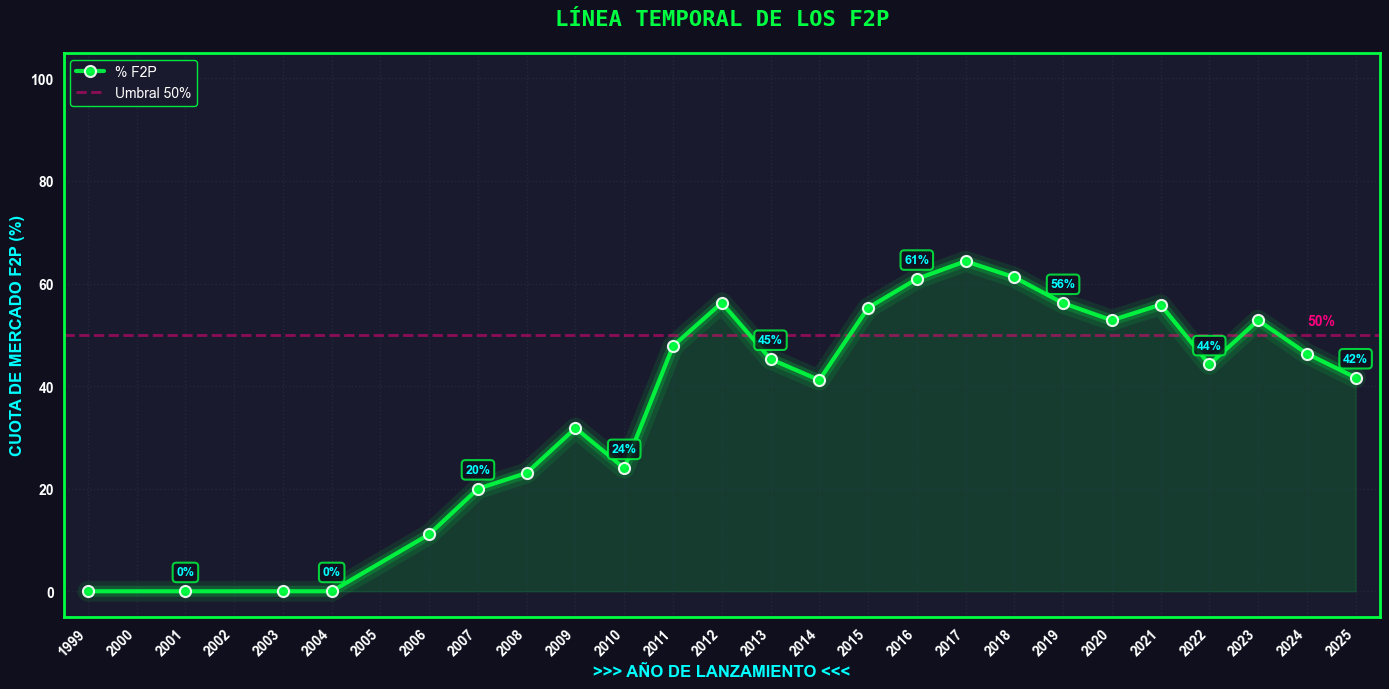

In [6]:
#Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'  
COLOR_ACCENT = '#ff0080'  
COLOR_TEXT = '#00ffff'  
fig, ax = plt.subplots(figsize=(14, 7))
# Línea principal con efecto glow
ax.plot(f2p_propor['release_year'].values, f2p_propor['f2p_proporcion'].values,
        marker='o', linewidth=3, color=COLOR_F2P, 
        markersize=8, markeredgecolor='white', markeredgewidth=1.5,
        label='% F2P', alpha=0.9, zorder=3)
# Efecto glow (líneas adicionales más gruesas y transparentes)
ax.plot(f2p_propor['release_year'].values, f2p_propor['f2p_proporcion'].values,
        linewidth=8, color=COLOR_F2P, alpha=0.2, zorder=2)
ax.plot(f2p_propor['release_year'].values, f2p_propor['f2p_proporcion'].values,
        linewidth=15, color=COLOR_F2P, alpha=0.1, zorder=1)
# Área bajo la curva con gradiente
ax.fill_between(f2p_propor['release_year'].values, 0, f2p_propor['f2p_proporcion'].values,
                alpha=0.15, color=COLOR_F2P, zorder=0)
# Etiquetas cada 3 años
for i in f2p_propor.itertuples():
    if int(i.release_year) % 3 == 0:
        ax.text(i.release_year, i.f2p_proporcion + 2.5,
                f"{i.f2p_proporcion:.0f}%",
                ha='center', va='bottom', fontsize=9,
                color=COLOR_TEXT, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#0f0f1e', 
                         edgecolor=COLOR_F2P, linewidth=1.5, alpha=0.8))
# Línea horizontal de referencia al 50%
ax.axhline(50, color=COLOR_ACCENT, linestyle='--', linewidth=2, 
           alpha=0.5, label='Umbral 50%')
ax.text(f2p_propor['release_year'].max() - 1, 52, '50%', 
        color=COLOR_ACCENT, fontsize=10, fontweight='bold')
# Títulos y labels con estilo gaming
ax.set_title('LÍNEA TEMPORAL DE LOS F2P',
             fontsize=16, fontweight='bold', color=COLOR_F2P, 
             family='monospace', pad=20)
ax.set_xlabel('>>> AÑO DE LANZAMIENTO <<<', fontsize=12, color=COLOR_TEXT, fontweight='bold')
ax.set_ylabel('CUOTA DE MERCADO F2P (%)', fontsize=12, color=COLOR_TEXT, fontweight='bold')
# Eje X (años)
all_years = np.arange(f2p_propor['release_year'].min(), 
                      f2p_propor['release_year'].max() + 1, 1)
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=45, ha='right', fontsize=10, color='white', fontweight='bold')
# Eje Y (Cuota de mercado en %)
ax.tick_params(axis='y', labelsize=10, colors='white', width=2)
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Límites
ax.set_ylim(-5, 105)
ax.set_xlim(f2p_propor['release_year'].min() - 0.5, 
            f2p_propor['release_year'].max() + 0.5)
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4) #Grid
# Leyenda
ax.legend(loc='upper left', framealpha=0.9, facecolor='#1a1a2e', 
          edgecolor=COLOR_F2P, fontsize=10, labelcolor='w')
# Bordes
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_F2P)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();

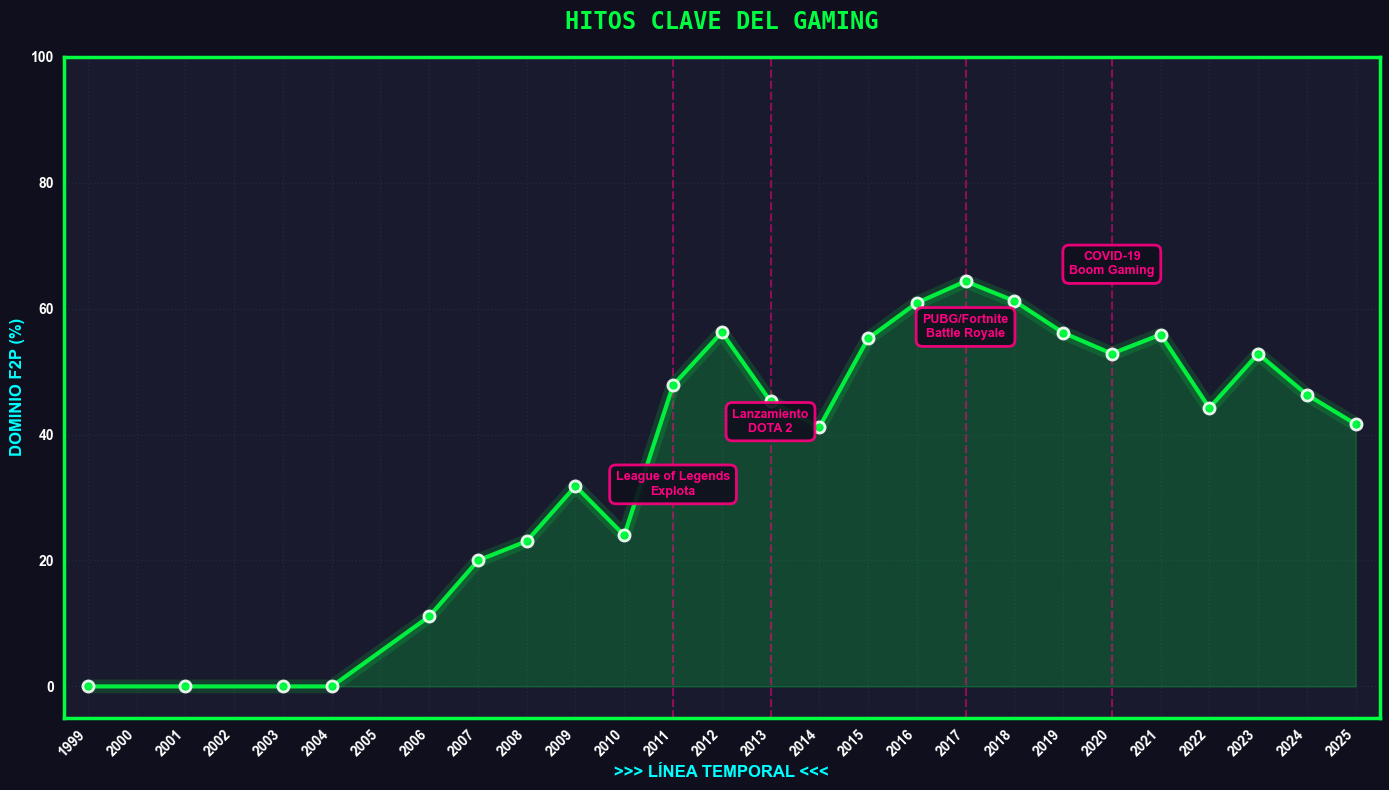

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))
# Línea principal
ax.plot(f2p_propor['release_year'].values, f2p_propor['f2p_proporcion'].values,
        marker='o', linewidth=3, color=COLOR_F2P, 
        markersize=8, markeredgecolor='white', markeredgewidth=2,
        alpha=0.9, zorder=3)
# Glow
ax.plot(f2p_propor['release_year'].values, f2p_propor['f2p_proporcion'].values,
        linewidth=10, color=COLOR_F2P, alpha=0.15, zorder=2)
# Área bajo curva
ax.fill_between(f2p_propor['release_year'].values, 0, f2p_propor['f2p_proporcion'].values,
                alpha=0.2, color=COLOR_F2P)
# EVENTOS
eventos = [
    (2011, 'League of Legends\nExplota', 30),
    (2013, 'Lanzamiento\nDOTA 2', 40),
    (2017, 'PUBG/Fortnite\nBattle Royale', 55),
    (2020, 'COVID-19\nBoom Gaming', 65)
]
for year, evento, y_pos in eventos:
    if f2p_propor['release_year'].min() <= year <= f2p_propor['release_year'].max():
        ax.axvline(year, color=COLOR_ACCENT, linestyle='--', 
                   linewidth=1.5, alpha=0.5, zorder=1)
        ax.text(year, y_pos, evento, 
                ha='center', va='bottom', fontsize=9,
                color=COLOR_ACCENT, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='#0f0f1e', 
                         edgecolor=COLOR_ACCENT, linewidth=2, alpha=0.9),
                rotation=0)
# Título épico
ax.set_title('HITOS CLAVE DEL GAMING', 
             fontsize=17, fontweight='bold', color=COLOR_F2P, 
             family='monospace', pad=20)
ax.set_xlabel('>>> LÍNEA TEMPORAL <<<', fontsize=12, color=COLOR_TEXT, fontweight='bold')
ax.set_ylabel('DOMINIO F2P (%)', fontsize=12, color=COLOR_TEXT, fontweight='bold')
# Eje X (años)
all_years = np.arange(f2p_propor['release_year'].min(), 
                      f2p_propor['release_year'].max() + 1, 1)
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=45, ha='right', fontsize=10, color='white', fontweight='bold')
# Eje Y (Cuota de mercado en %)
ax.tick_params(axis='y', labelsize=10, colors='white', width=2)
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Config
ax.set_ylim(-5, 100)
ax.set_xlim(f2p_propor['release_year'].min() - 0.5, 
            f2p_propor['release_year'].max() + 0.5)
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4)
# Spines
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_F2P)
    spine.set_linewidth(2.5)
plt.tight_layout()
plt.show();

   is_free  count  porcentaje           label
0     True   1350   55.670103    Free-to-Play
1    False   1075   44.329897  Juegos de Pago


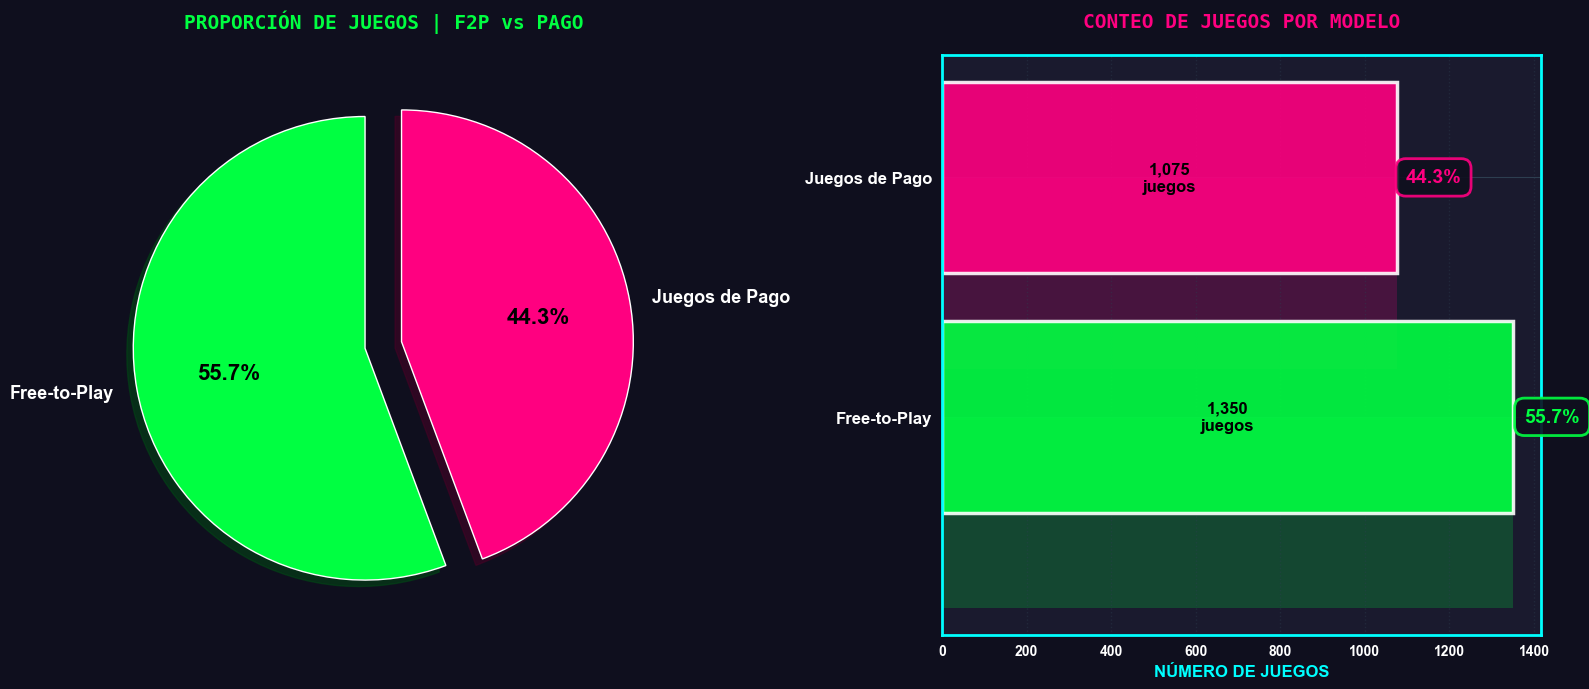

In [8]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Contamos juegos por tipo (F2P o Paid)
game_counts = df_total['is_free'].value_counts().reset_index()
game_counts.columns = ['is_free', 'count']
game_counts['porcentaje'] = (game_counts['count'] / game_counts['count'].sum()) * 100
# Labels
game_counts['label'] = game_counts['is_free'].map({
    False: 'Juegos de Pago',
    True: 'Free-to-Play'
})
# Contamos los f2p
game_counts = game_counts.sort_values('is_free', ascending=False)
print(game_counts)
#Esquema del gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
color_gaming = [COLOR_F2P, COLOR_PAID]
# Primer gráfico (Pie chart)
explode = (0.08, 0.08)
wedges, texts, autotexts = ax1.pie(
    game_counts['count'],
    labels=game_counts['label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=color_gaming,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 13, 'fontweight': 'bold', 'color': 'white'}
)
# Mejorar textos
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

ax1.set_title('PROPORCIÓN DE JUEGOS | F2P vs PAGO', 
              fontsize=14, fontweight='bold', color=COLOR_F2P,
              family='monospace', pad=20)

# Grafico 2 (Bar chart)
bars = ax2.barh(game_counts['label'], 
                game_counts['count'],
                color=color_gaming,
                edgecolor='white', linewidth=2.5, alpha=0.9)

# Glow
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.barh(bar.get_y(), width, bar.get_height(),
             color=color_gaming[i], alpha=0.2, linewidth=0, zorder=0)
# Añadimos valores a las barras
for i, (bar, row) in enumerate(zip(bars, game_counts.itertuples())):
    width = bar.get_width()    
    # Valor absoluto dentro
    ax2.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{row.count:,}\njuegos',
             ha='center', va='center', fontsize=12,
             color='black', fontweight='bold')    
    # Porcentaje fuera
    ax2.text(width + width*0.02, bar.get_y() + bar.get_height()/2,
             f'{row.porcentaje:.1f}%',
             ha='left', va='center', fontsize=14,
             color=color_gaming[i], fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#0f0f1e',
                      edgecolor=color_gaming[i], linewidth=2, alpha=0.9))
ax2.set_xlabel('NÚMERO DE JUEGOS', fontsize=12,
               color=COLOR_TEXT, fontweight='bold')
ax2.set_title('CONTEO DE JUEGOS POR MODELO',
              fontsize=14, fontweight='bold', color=COLOR_PAID,
              family='monospace', pad=20)
ax2.tick_params(axis='x', labelsize=10, colors='w')
ax2.tick_params(axis='y', labelsize=12, colors='w')
for label in ax2.get_xticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
for label in ax2.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Grid y spines
ax2.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='x')
for spine in ax2.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();

Total juegos:      2,446
Total F2P:         1,350 (55.2%)
Total Paid:        1,096 (44.8%)
 release_year  n_juegos  f2p_proporcion  peso_year  f2p_juegos  paid_juegos
         1999         1        0.000000   0.040883           0            1
         2001         1        0.000000   0.040883           0            1
         2003         1        0.000000   0.040883           0            1
         2004         2        0.000000   0.081766           0            2
         2006         9       11.111111   0.367948           1            8
         2007        10       20.000000   0.408831           2            8
         2008        13       23.076923   0.531480           3           10
         2009        22       31.818182   0.899428           7           15
         2010        25       24.000000   1.022077           6           19
         2011        23       47.826087   0.940311          11           12
         2012        32       56.250000   1.308258          18           

C:\Users\migue\AppData\Local\Temp\ipykernel_22100\3885299184.py:85: UserWarning: Glyph 127379 (\N{SQUARED FREE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127379 (\N{SQUARED FREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


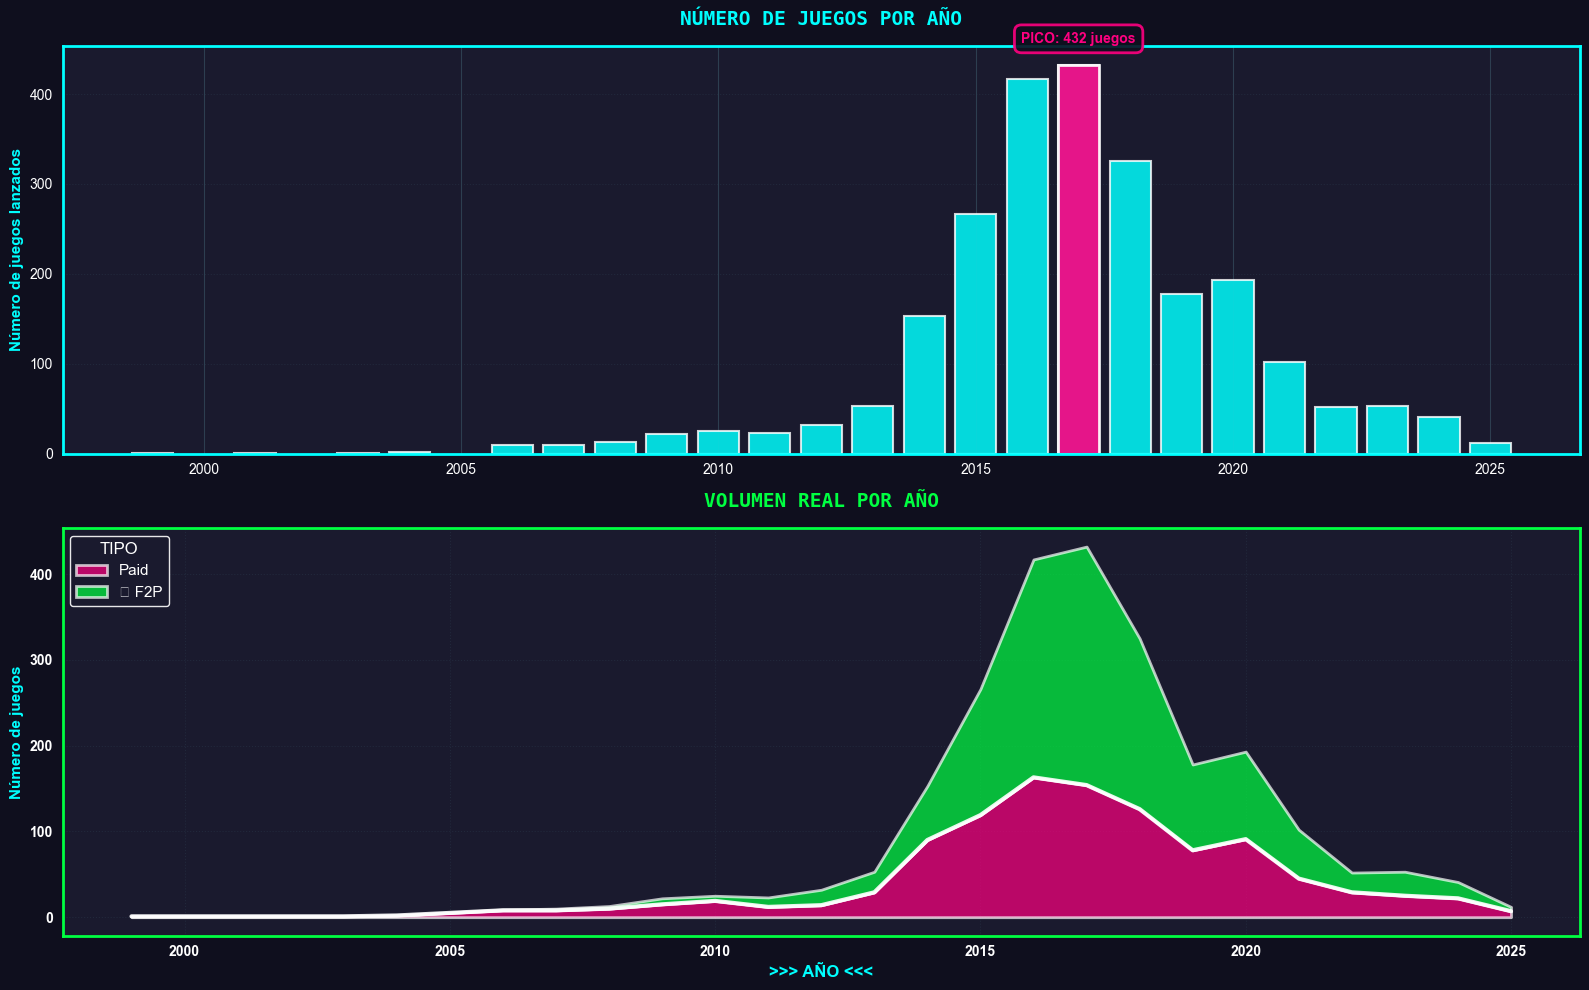

In [9]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Total global
total_f2p_global = df_enriched['is_free'].sum()
total_games_global = len(df_total)
f2p_global_pct = (total_f2p_global / total_games_global) * 100
print(f"Total juegos:     {total_games_global:>6,}")
print(f"Total F2P:        {total_f2p_global:>6,} ({f2p_global_pct:.1f}%)")
print(f"Total Paid:       {total_games_global - total_f2p_global:>6,} ({100-f2p_global_pct:.1f}%)")
# Ánalisis de los juegos por año
games_per_year = df_total.groupby('release_year').size().reset_index(name='n_juegos')
# Merge con f2p_propor
analysis = f2p_propor.merge(games_per_year, on='release_year')
# Calcular contribución al total
analysis['f2p_juegos'] = (analysis['f2p_proporcion'] / 100 * analysis['n_juegos']).astype(int)
analysis['paid_juegos'] = analysis['n_juegos'] - analysis['f2p_juegos']
analysis['peso_year'] = (analysis['n_juegos'] / total_games_global * 100)
print(analysis[['release_year', 'n_juegos', 'f2p_proporcion', 'peso_year', 'f2p_juegos', 'paid_juegos']].to_string(index=False))
# 2 gráficos
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
# 1: Número de juegos por año
ax2 = axes[0]
bars = ax2.bar(analysis['release_year'], analysis['n_juegos'],
               color=COLOR_TEXT, edgecolor='white', linewidth=1.5, alpha=0.8)
ax2.bar(analysis['release_year'], analysis['n_juegos'],
        color=COLOR_TEXT, alpha=0.2, linewidth=0, zorder=0)
max_year = analysis.loc[analysis['n_juegos'].idxmax(), 'release_year']
max_count = analysis['n_juegos'].max()
ax2.bar(max_year, max_count, color=COLOR_PAID, edgecolor='white', linewidth=2, alpha=0.9)
ax2.text(max_year, max_count + max_count*0.05, f'PICO: {max_count} juegos',
         ha='center', va='bottom', fontsize=10, color=COLOR_PAID, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#0f0f1e', 
                  edgecolor=COLOR_PAID, linewidth=2, alpha=0.9))
ax2.set_title('NÚMERO DE JUEGOS POR AÑO',
              fontsize=14, fontweight='bold', color=COLOR_TEXT, family='monospace', pad=15)
ax2.set_ylabel('Número de juegos lanzados', fontsize=11, color=COLOR_TEXT, fontweight='bold')
ax2.tick_params(axis='both', labelsize=10, colors='white')
ax2.grid(True, linestyle=':', alpha=0.4, axis='y')
for spine in ax2.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)
# 2: Stacked área
ax3 = axes[1]
ax3.fill_between(analysis['release_year'], 0, analysis['paid_juegos'],
                 color=COLOR_PAID, alpha=0.7, label='Paid', 
                 edgecolor='white', linewidth=2)
ax3.fill_between(analysis['release_year'], 
                 analysis['paid_juegos'],
                 analysis['paid_juegos'] + analysis['f2p_juegos'],
                 color=COLOR_F2P, alpha=0.7, label='🆓 F2P', 
                 edgecolor='white', linewidth=2)
ax3.plot(analysis['release_year'], analysis['paid_juegos'],
         color='white', linewidth=3, alpha=0.9, zorder=5)
ax3.set_title('VOLUMEN REAL POR AÑO',
              fontsize=14, fontweight='bold', color=COLOR_F2P, 
              family='monospace', pad=15)
ax3.set_xlabel('>>> AÑO <<<', fontsize=12, color=COLOR_TEXT, fontweight='bold')
ax3.set_ylabel('Número de juegos', fontsize=11, color=COLOR_TEXT, fontweight='bold')
legend3 = ax3.legend(loc='upper left', fontsize=11, framealpha=0.9, 
                     facecolor='#1a1a2e', edgecolor='white', 
                     title='TIPO', title_fontsize=12)
for text in legend3.get_texts():
    text.set_color('white')
legend3.get_title().set_color('white')
ax3.tick_params(axis='both', labelsize=10, colors='white')
for label in ax3.get_xticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
for label in ax3.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
ax3.grid(True, linestyle=':', alpha=0.4)
for spine in ax3.spines.values():
    spine.set_edgecolor(COLOR_F2P)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();